In [110]:
# imports
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import dgamma

# plot settings
plt.rcParams['figure.dpi'] = 100
font = {'fontname':'Avenir',
        'size':'14'}
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

In [7]:
# input gene info
n = 948 # length of pairwise alignment region
nts = 84 # number of transitions
ntv = 6 # number of transversions 

In [122]:
# log-likehood function in Kimura substitution: log f(D|d,k) for D(n_s, n_v)
def kimura(d, k, n = 948, nts = 84, ntv = 6):
    p0 = 0.25 + 0.25 * math.exp(-4 * d / (k+2)) + 0.5 * math.exp(-2 * d * (k + 1) / (k + 2))
    p1 = 0.25 + 0.25 * math.exp(-4 * d / (k+2)) - 0.5 * math.exp(-2 * d * (k + 1) / (k + 2))
    p2 = 0.25 + 0.25 * math.exp(-4 * d / (k+2))
    
    return((n - nts - ntv * math.log(p0 / 4) + nts * math.log(p1 / 4) + ntv * math.log(p2 / 4)))

In [10]:
# plotting likelihood, prior, and posterior surfaces
dim = 100
dv = np.linspace(0, 0.3, dim)
kv = np.linspace(0, 100, dim)

# basically R expand.grid()
dk = np.array([(x, y) for x in dv for y in kv])


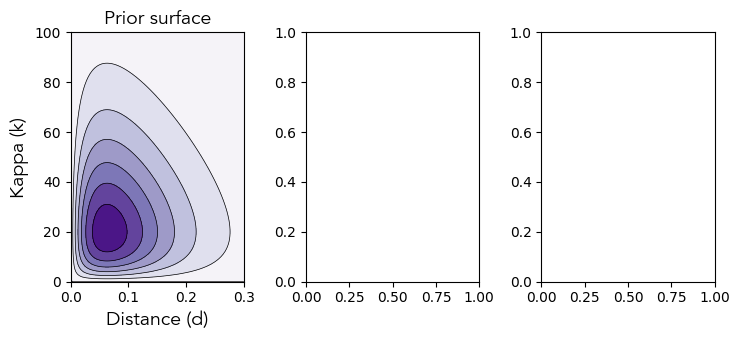

In [118]:
X, Y = np.meshgrid(dv, kv)
Z = np.split(np.array(dgamma.pdf(dk[:,0], 2, scale = 0.06) * dgamma.pdf(dk[:,1], 2, scale = 21)), 100)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# prior surface, f(D) f(k)
ax1.contourf(X, Y, Z, cmap = 'Purples')
ax1.contour(X, Y, Z, colors = 'black', linewidths = 0.5)
ax1.set_title('Prior surface', **font)
ax1.set_xlabel('Distance (d)', **font)
ax1.set_ylabel('Kappa (k)', **font)
plt.show()

In [124]:
# likelihood surface, f(D|d, k)
lnL = kimura(d = dk[:, 0], k = dk[:, 1])

TypeError: only size-1 arrays can be converted to Python scalars